In [15]:
# 缺失值多的属性删掉
# 当某个属性的缺失值所占的比例达到 THRESHOLD 时，认为应该删掉该属性
import pandas as pd

data = pd.read_csv("../std_data.csv").drop(columns=['id','type'])

all_variables = ['sio', 'nao', 'ko', 'cao', 'mgo', 'alo', 'feo', 'cuo', 'pbo', 'bao', 'po', 'sro', 'sno', 'so']

data = data[all_variables]

column_name_dict = {
    "sio": "SiO2",
    "nao": "Na2O"  ,
    "ko" : "K2O"   ,
    "cao": "CaO"   , 
    "mgo": "MgO"   ,
    "alo": "Al2O3" ,
    "feo": "Fe2O3" ,
    "cuo": "CuO"   ,
    "pbo": "PbO"   ,
    "bao": "BaO"   ,
    "po" : "P2O5",
    "sro": "SrO"   ,
    "sno": "SnO2"  ,
    "so" : "SO2" ,
}
THRESHOLD = 0.75

results = []

for variable in all_variables:
    results.append([variable, len(data[data[variable] < 1e-3]) / len(data) * 100])

results = pd.DataFrame(results)
results.columns = ['成分', '缺失值占比(%)']
results[['缺失值占比(%)']] = results[['缺失值占比(%)']].astype('float')

results = results.sort_values(by='缺失值占比(%)',ascending=False)
results['成分'] = results['成分'].map(column_name_dict)
results.to_csv("缺失值占比.csv",index=False,float_format='%.2f')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 12 to 0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   成分        14 non-null     object 
 1   缺失值占比(%)  14 non-null     float64
dtypes: float64(1), object(1)
memory usage: 336.0+ bytes
None


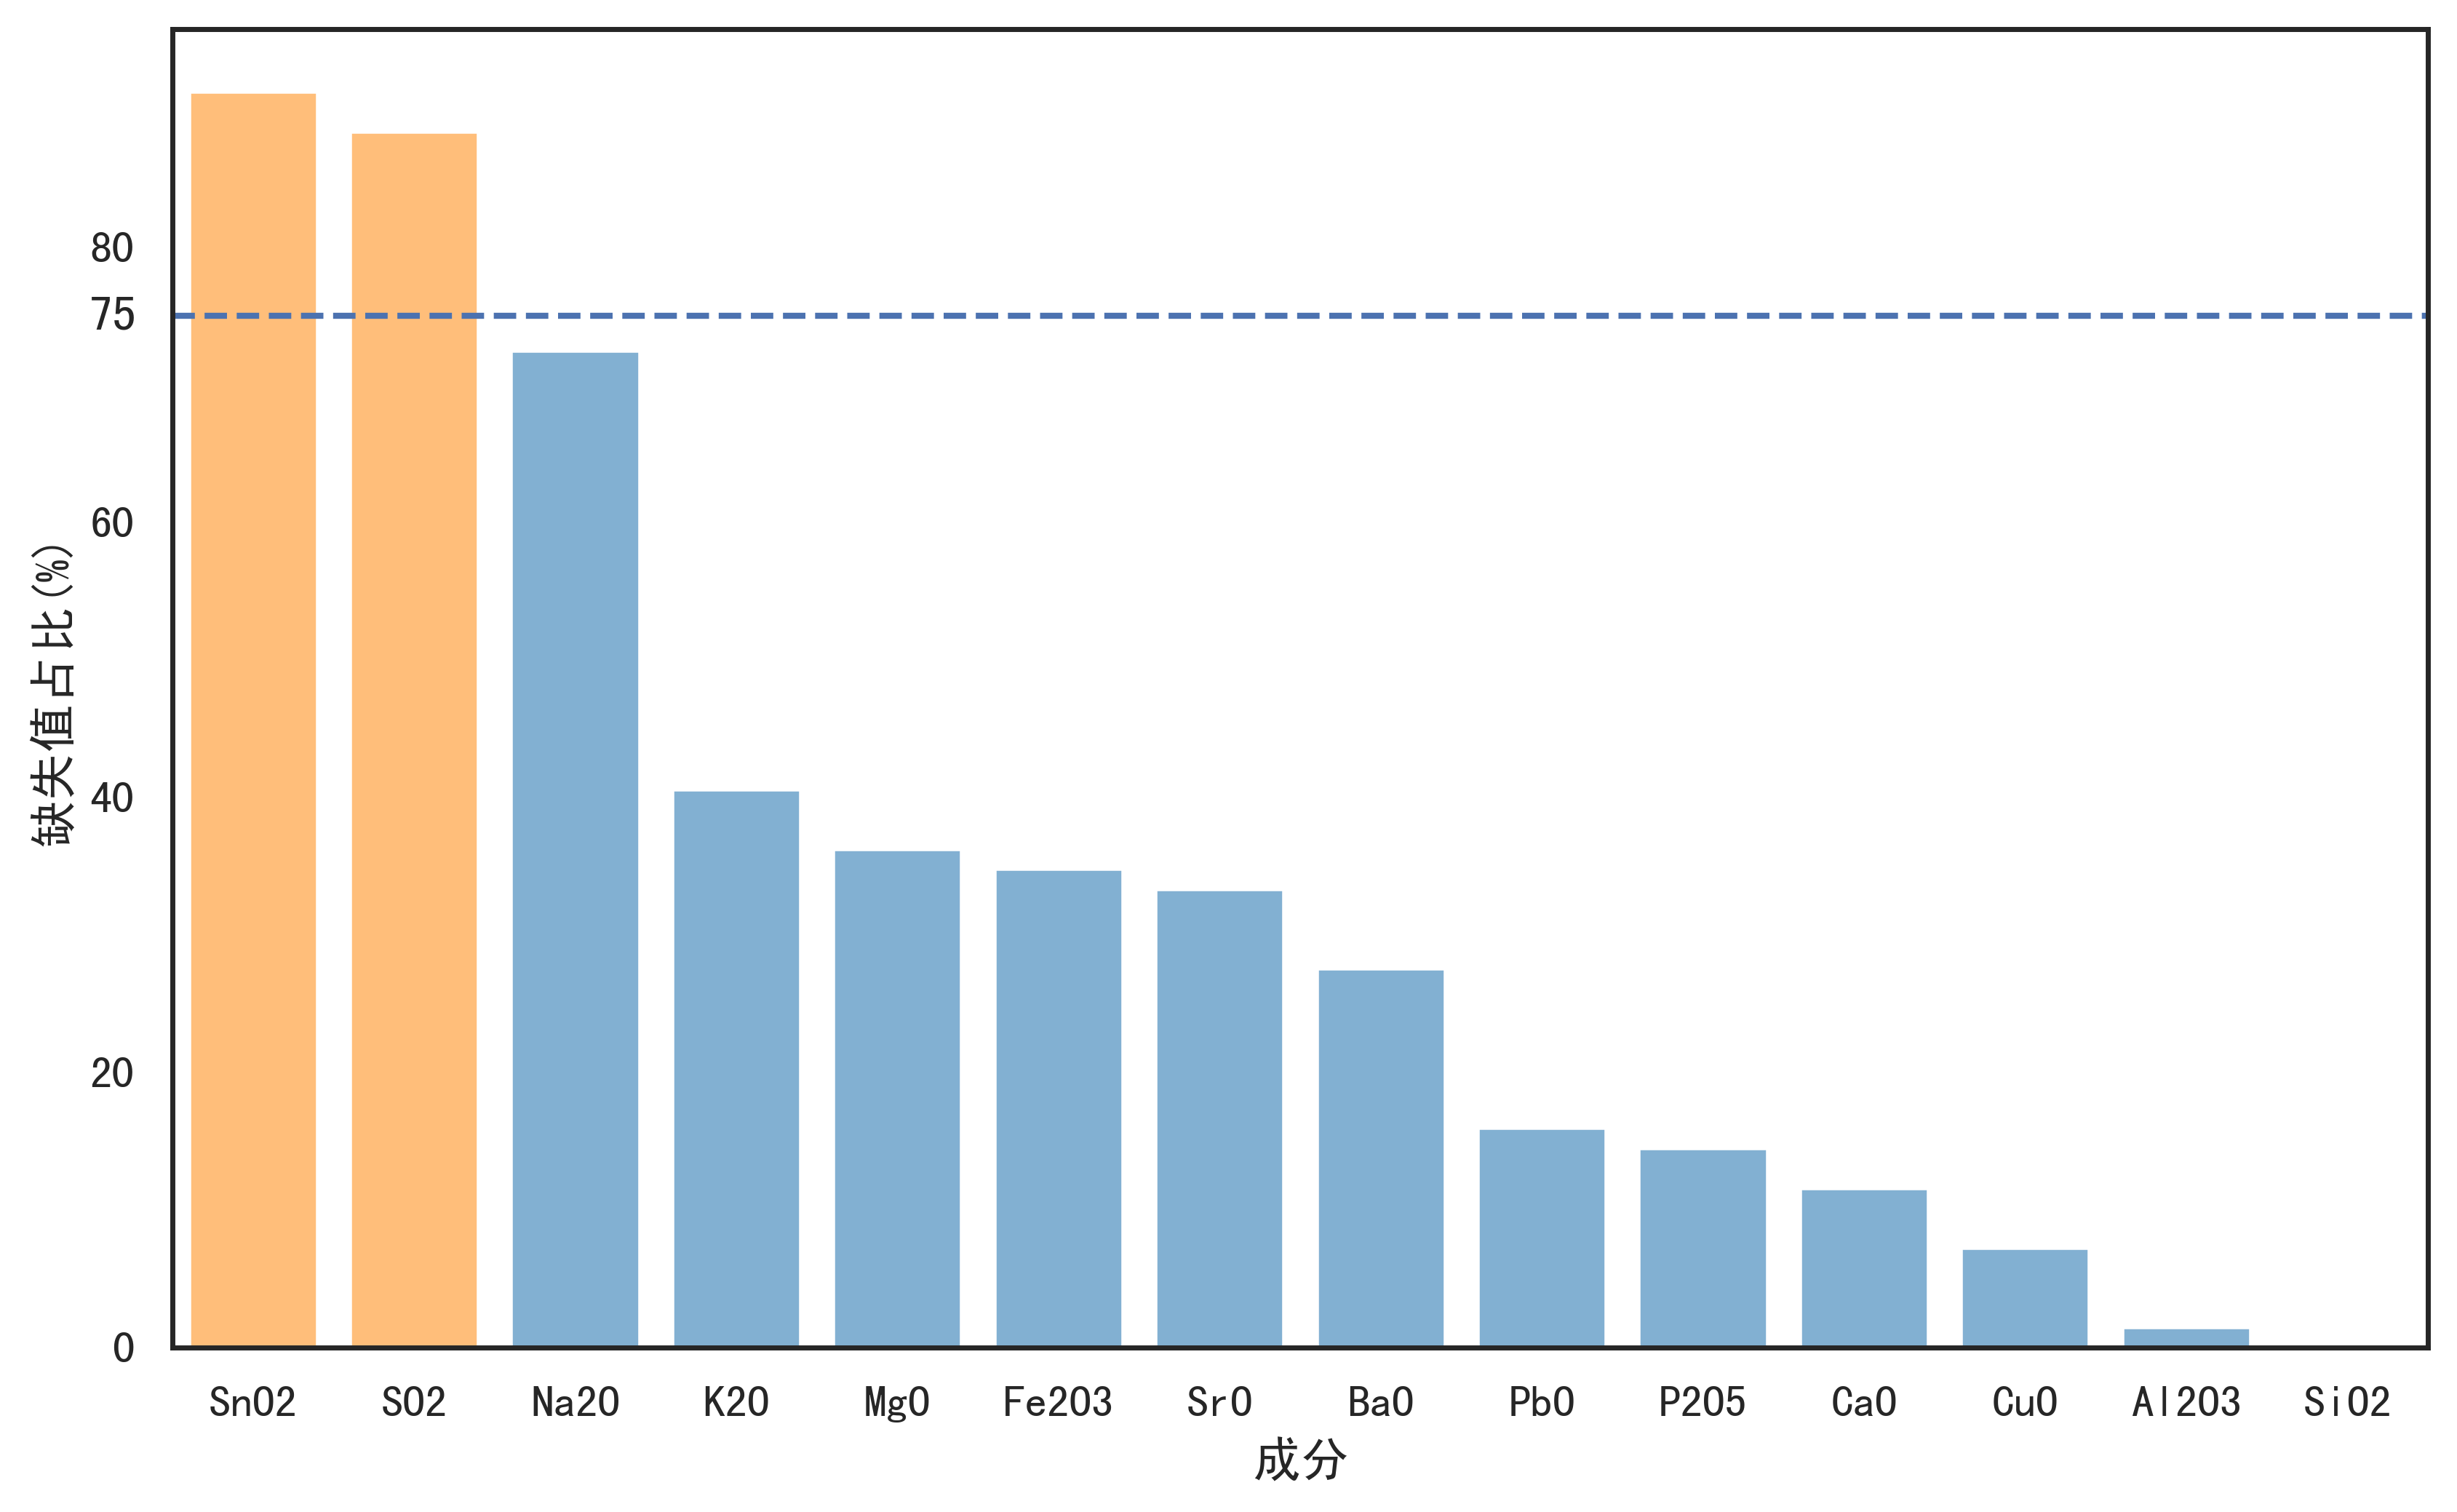

In [34]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set(font='SimHei',style='white')

plt.figure(figsize=(10,6),dpi=400)
ax = sns.barplot(data=pd.read_csv('./缺失值占比.csv'), x='成分', y='缺失值占比(%)')
ax.axhline(75, ls='--')
ax.text(-1.02,74, '75')

for x in ax.containers:
    for y in x:
        y.set_facecolor('#FFBE7A' if y.get_height() > 75 else '#82B0D2')
        
plt.savefig("缺失值占比.png")

In [43]:
# 缺失值多的属性删掉
# 当某个属性的缺失值所占的比例达到 THRESHOLD 时，认为应该删掉该属性
import pandas as pd
import numpy as np

data = pd.read_csv("../std_data.csv").drop(columns=['id','type'])

all_variables = ['sio', 'nao', 'ko', 'cao', 'mgo', 'alo', 'feo', 'cuo', 'pbo', 'bao', 'po', 'sro', 'sno', 'so']

data = data[all_variables]

column_name_dict = {
    "sio": "SiO2",
    "nao": "Na2O"  ,
    "ko" : "K2O"   ,
    "cao": "CaO"   , 
    "mgo": "MgO"   ,
    "alo": "Al2O3" ,
    "feo": "Fe2O3" ,
    "cuo": "CuO"   ,
    "pbo": "PbO"   ,
    "bao": "BaO"   ,
    "po" : "P2O5",
    "sro": "SrO"   ,
    "sno": "SnO2"  ,
    "so" : "SO2" ,
}
THRESHOLD = 1.0

results = []

for variable in all_variables:
    results.append([variable, np.std(data[variable])])

results = pd.DataFrame(results)
results.columns = ['成分', '标准差']
results[['标准差']] = results[['标准差']].astype('float')

results = results.sort_values(by='标准差',ascending=True)
results['成分'] = results['成分'].map(column_name_dict)
results.to_csv("成分_标准差.csv",index=False,float_format='%.2f')


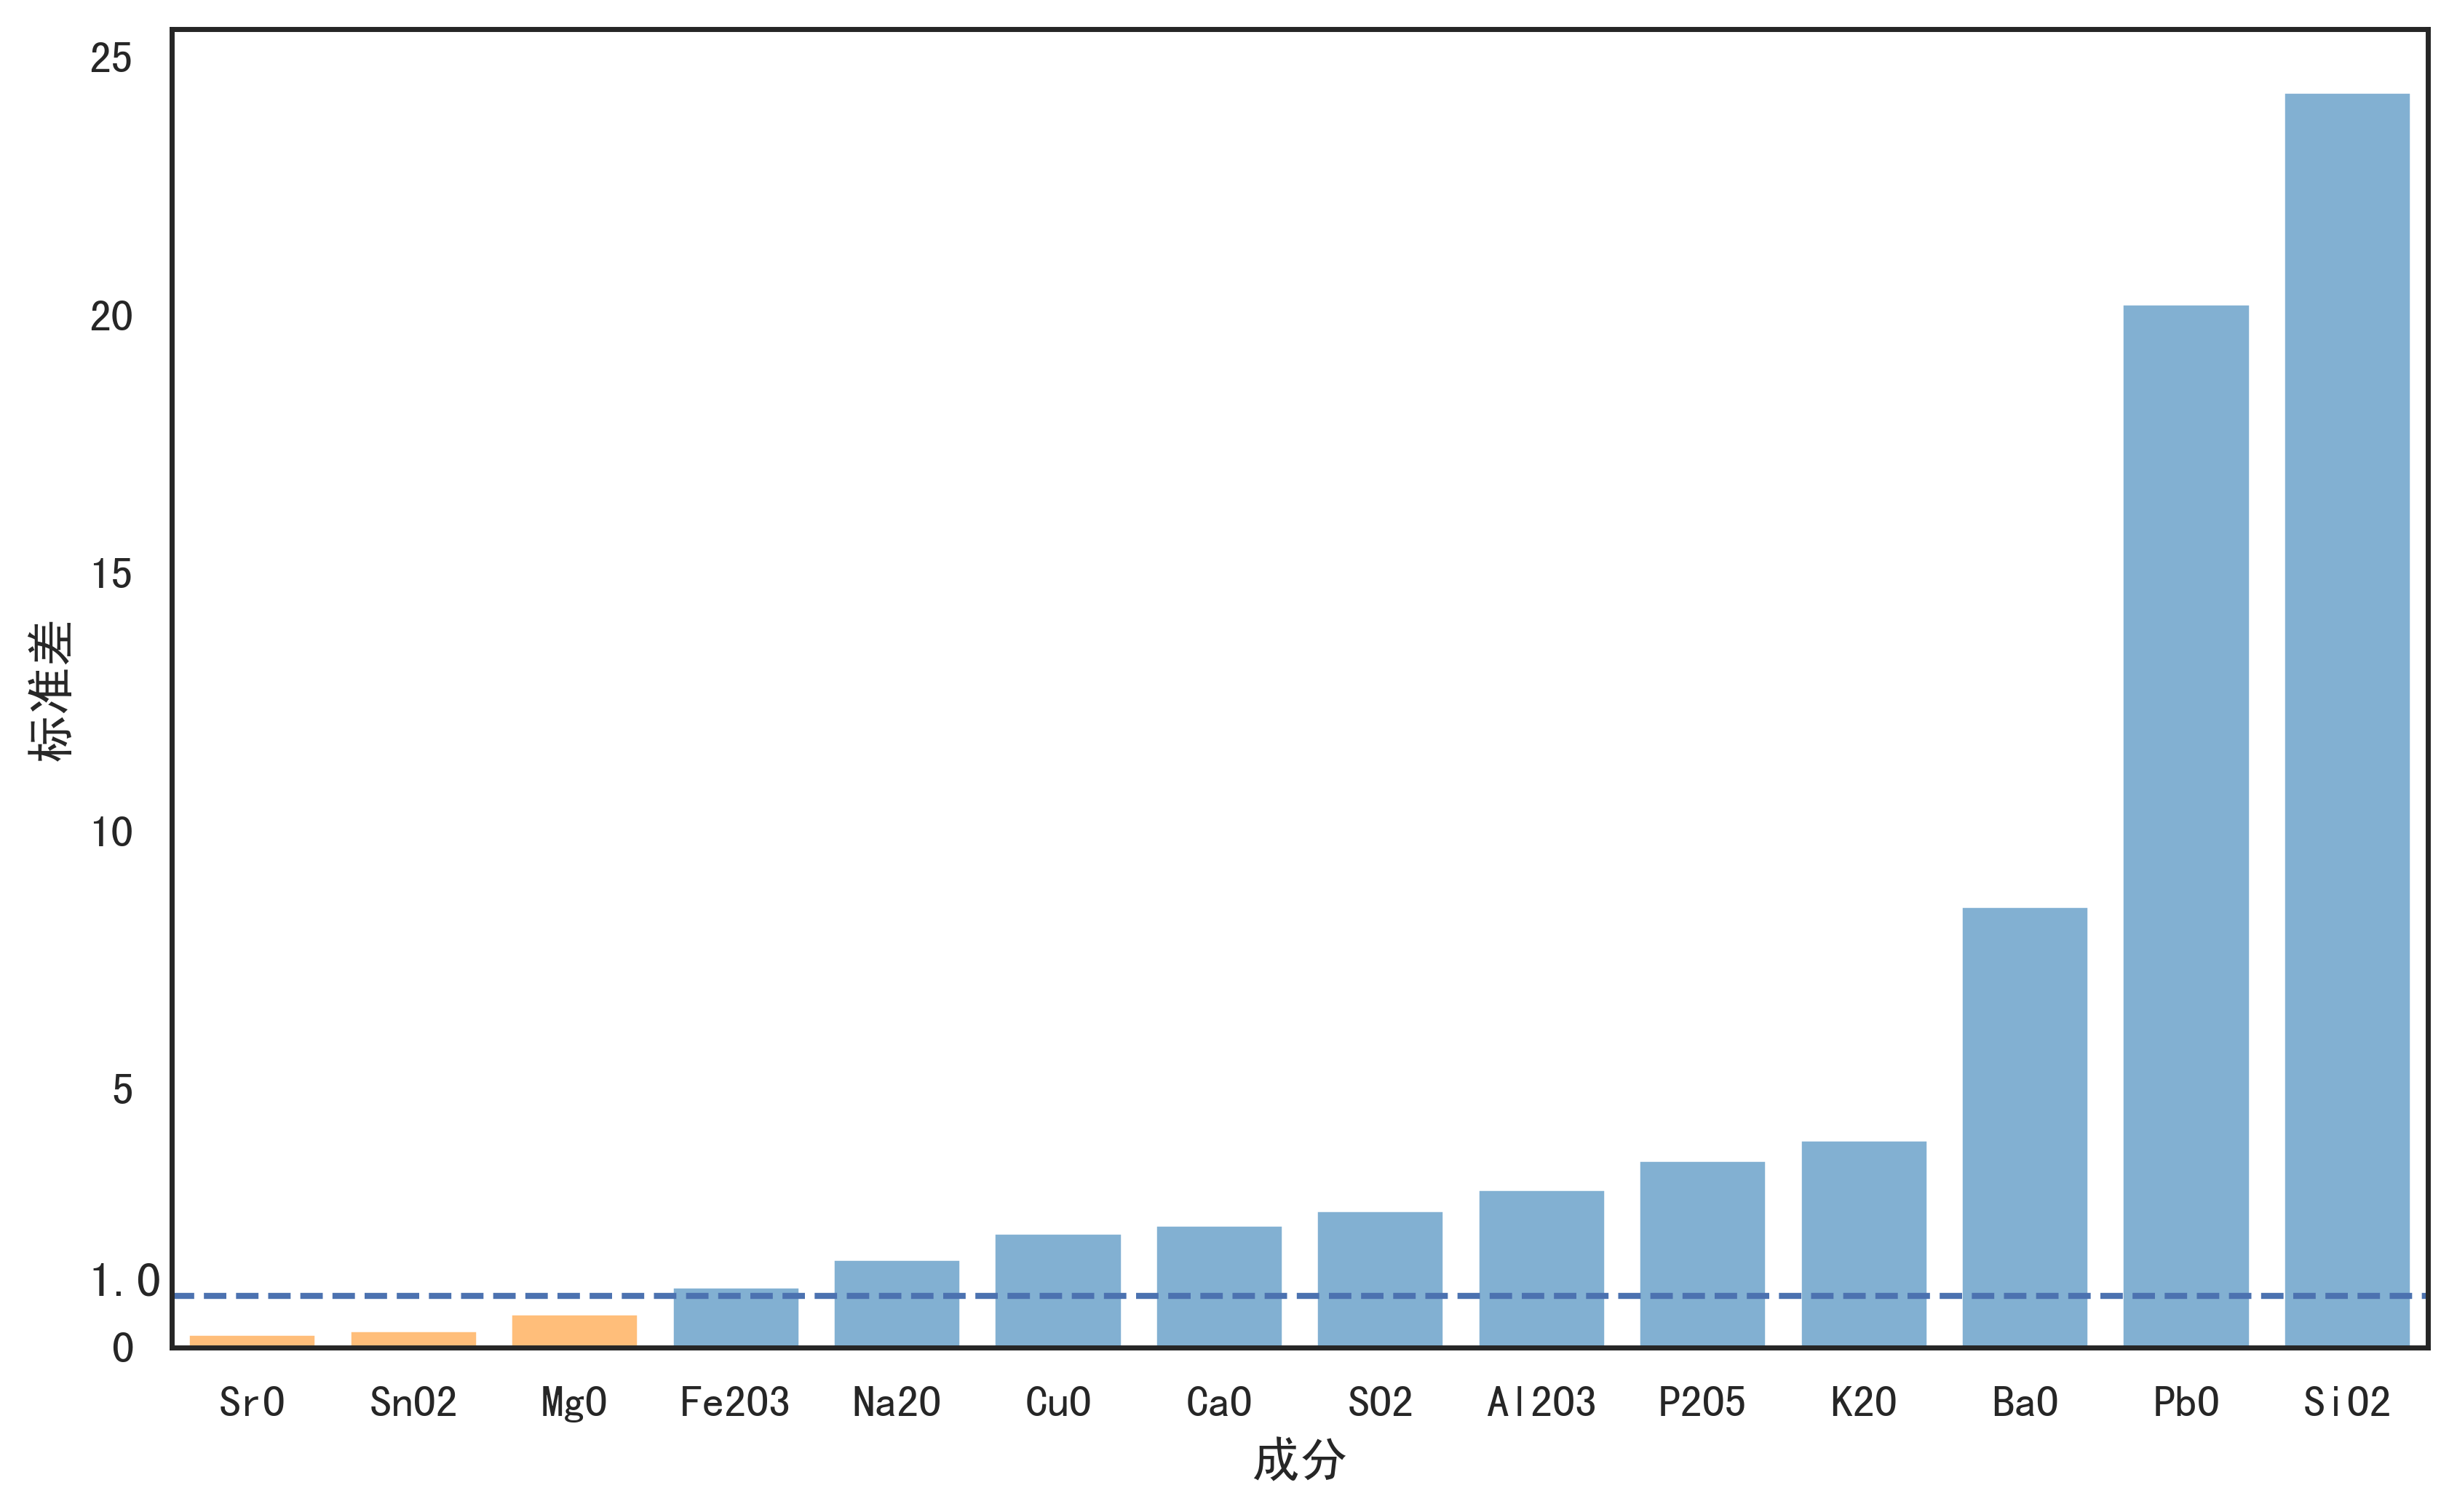

In [49]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set(font='SimHei',style='white')

plt.figure(figsize=(10,6),dpi=400)
ax = sns.barplot(data=pd.read_csv('./成分_标准差.csv'), x='成分', y='标准差')
ax.axhline(1, ls='--')
ax.text(-1.02,1, '1.0')

for x in ax.containers:
    for y in x:
        y.set_facecolor('#FFBE7A' if y.get_height() < 1 else '#82B0D2')

plt.savefig("成分_标准差_bar_plot.png")

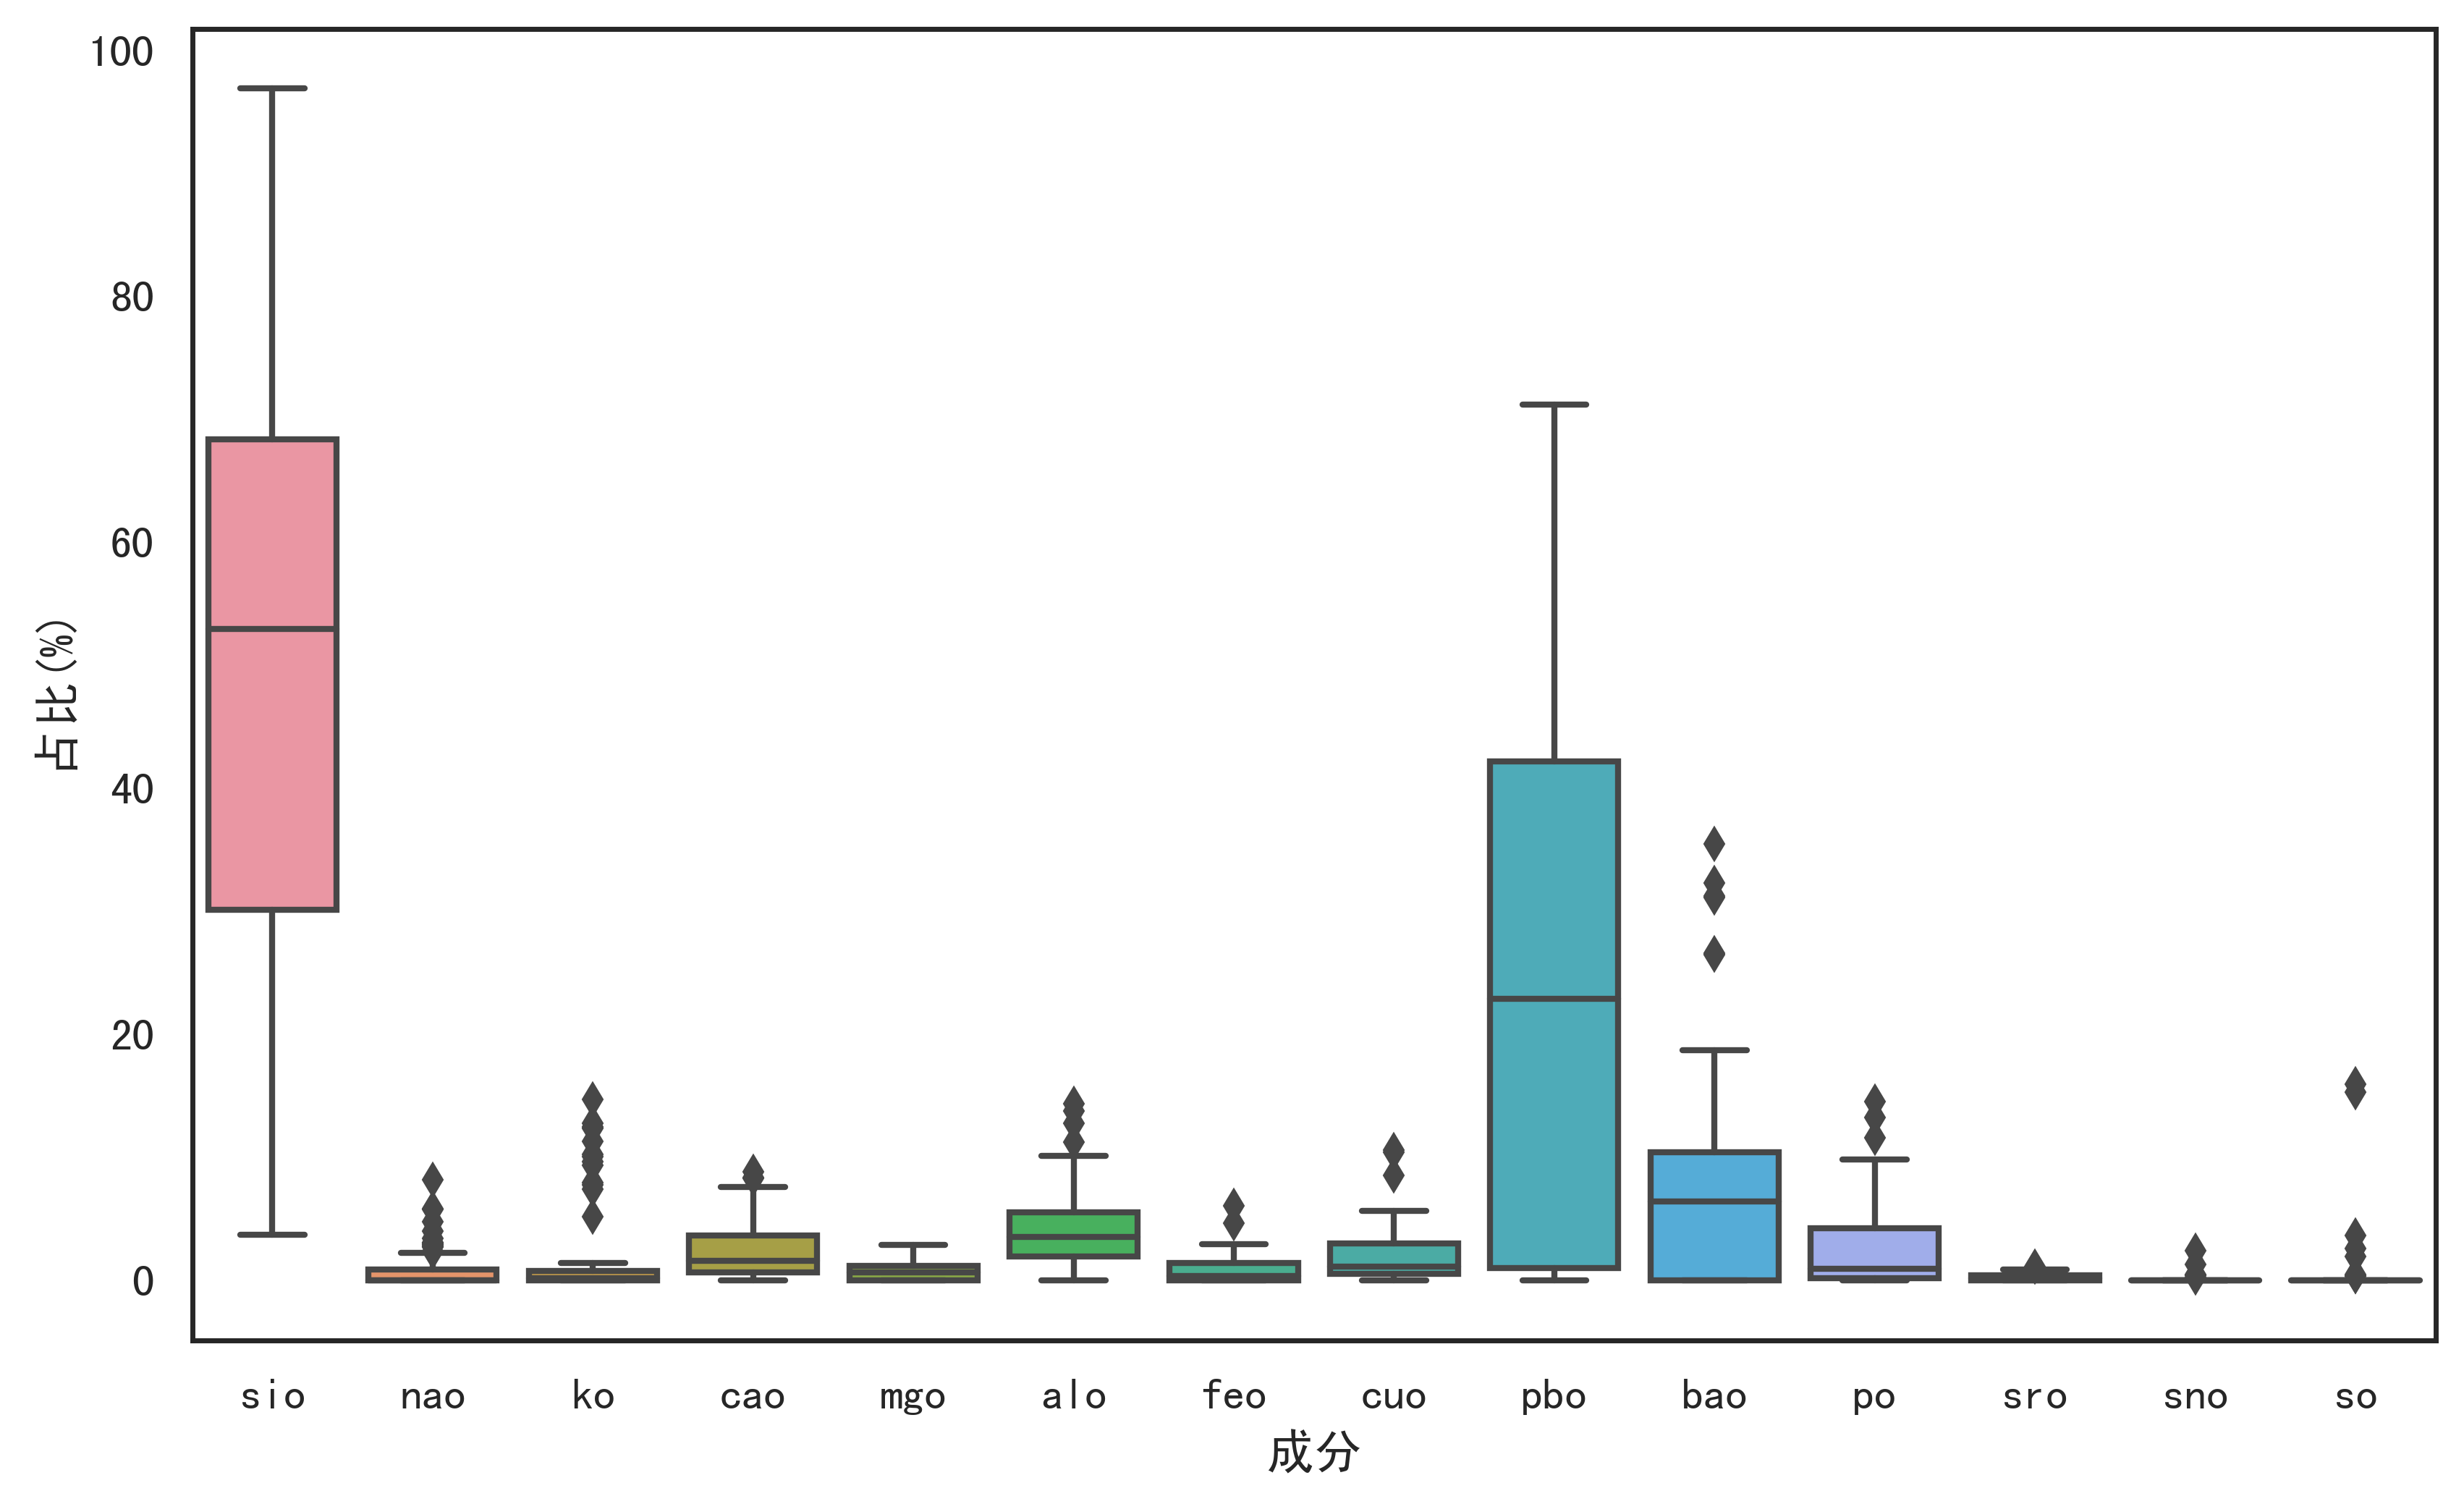

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set(font='SimHei',style='white')

data = pd.read_csv('../std_data.csv').drop(columns=['id','type','degree'])

all_variables = ['sio', 'nao', 'ko', 'cao', 'mgo', 'alo', 'feo', 'cuo', 'pbo', 'bao', 'po', 'sro', 'sno', 'so']

data = pd.melt(data, id_vars=[], value_vars=all_variables)

data.columns = data.columns.map({
    'variable' : '成分',
    'value'    : '占比(%)'
})

plt.figure(figsize=(10,6),dpi=400)
ax = sns.boxplot(data=data, x='成分', y='占比(%)')

plt.savefig("成分_占比_box_plot.png")